In [48]:
import sys
import os
import pandas as pd
import requests

In [49]:
# all genes in Allen Brain Atlas... by default, this will only return the first 50 rows of the query
all_genes_query = "http://api.brain-map.org/api/v2/data/Gene/query.json"
all_genes_response = requests.get(all_genes_query).json()

# put the results into a pandas dataframe
all_genes = pd.DataFrame(all_genes_response['msg'])
all_genes.head()

,acronym,alias_tags,chromosome_id,ensembl_id,entrez_id,genomic_reference_update_id,homologene_id,id,legacy_ensembl_gene_id,name,organism_id,original_name,original_symbol,reference_genome_id,sphinx_id,version_status
0,A1BG,A1B ABG DKFZp686F0970 GAB HYST2477,12,None,1,491928275,11167.0,2,None,alpha-1-B glycoprotein,1,alpha-1-B glycoprotein,A1BG,None,131297,no change
1,A2M,A2MD CPAMD5 DKFZp779B086 FWP007 S863-7,5,None,2,491928275,37248.0,3,None,alpha-2-macroglobulin,1,alpha-2-macroglobulin,A2M,None,109391,no change
2,A2MP1,A2MP,5,None,3,491928275,NaN,4,None,alpha-2-macroglobulin pseudogene 1,1,alpha-2-macroglobulin pseudogene 1,A2MP1,None,131617,no change
3,NAT1,AAC1 MNAT NAT-1 NATI,27,None,9,491928275,37329.0,6,None,N-acetyltransferase 1 (arylamine N-acetyltrans...,1,N-acetyltransferase 1 (arylamine N-acetyltrans...,NAT1,None,110027,no change
4,NAT2,AAC2 NAT-2 PNAT,27,None,10,491928275,115468.0,7,None,N-acetyltransferase 2 (arylamine N-acetyltrans...,1,N-acetyltransferase 2 (arylamine N-acetyltrans...,NAT2,None,110308,no change


In [50]:
# all genes in developmental mouse: there are 2107
dev_mouse_criteria = "criteria=model::Gene,rma::criteria,products[abbreviation$eq'DevMouse']"
all_rows = "num_rows=all"
dev_mouse_genes_query = all_genes_query + "?" + dev_mouse_criteria + "&" + all_rows
print(dev_mouse_genes_query)
dev_mouse_genes_response = requests.get(dev_mouse_genes_query).json()

# put the results into a pandas dataframe
dev_mouse_genes = pd.DataFrame(dev_mouse_genes_response['msg'])

print(dev_mouse_genes.shape)
dev_mouse_genes.head()

http://api.brain-map.org/api/v2/data/Gene/query.json?criteria=model::Gene,rma::criteria,products[abbreviation$eq'DevMouse']&num_rows=all
(2107, 16)


,acronym,alias_tags,chromosome_id,ensembl_id,entrez_id,genomic_reference_update_id,homologene_id,id,legacy_ensembl_gene_id,name,organism_id,original_name,original_symbol,reference_genome_id,sphinx_id,version_status
0,Slc1a6,EAAT4,35.0,None,20513.0,491928275.0,21055.0,20275,None,solute carrier family 1 (high affinity asparta...,2,solute carrier family 1 (high affinity asparta...,Slc1a6,None,102670,no change
1,Lhx3,Lim3 mLim-3 mLIM3 P-LIM,47.0,None,16871.0,491928275.0,7814.0,16642,None,LIM homeobox protein 3,2,LIM homeobox protein 3,Lhx3,None,91840,no change
2,Dlx2,AW121999 Dlx-2 Tes-1,47.0,None,13392.0,491928275.0,3244.0,13171,None,distal-less homeobox 2,2,distal-less homeobox 2,Dlx2,None,92911,no change
3,Ncam2,Ncam-2 Ocam RNCAM,42.0,None,17968.0,491928275.0,3336.0,17735,None,neural cell adhesion molecule 2,2,neural cell adhesion molecule 2,Ncam2,None,89989,no change
4,Hcrtr1,MGC141357 Ox1r,49.0,None,230777.0,491928275.0,37492.0,87114,None,hypocretin (orexin) receptor 1,2,hypocretin (orexin) receptor 1,Hcrtr1,None,99831,no change


In [6]:
# our genes of interest
genes_of_interest = ['Robo2', 'Cdh5', 'Bmpr2']
our_genes = dev_mouse_genes[dev_mouse_genes.acronym.isin(genes_of_interest)]
our_genes.head()

,acronym,alias_tags,chromosome_id,ensembl_id,entrez_id,genomic_reference_update_id,homologene_id,id,legacy_ensembl_gene_id,name,organism_id,original_name,original_symbol,reference_genome_id,sphinx_id,version_status
851,Bmpr2,2610024H22Rik AL117858 AW546137 BB189135 BMP-2...,34.0,None,12168.0,491928275.0,929.0,11954,None,"bone morphogenetic protein receptor, type II (...",2,"bone morphogenic protein receptor, type II (se...",Bmpr2,None,358483,updated
1111,Robo2,2600013A04Rik 9430089E08Rik BB097918 D230004I2...,42.0,None,268902.0,491928275.0,43188.0,92611,None,roundabout homolog 2 (Drosophila),2,roundabout homolog 2 (Drosophila),Robo2,None,103280,no change
1447,Cdh5,7B4 AA408225 Cd144 CD144 Vec VEC VEcad VE-Cad ...,53.0,None,12562.0,491928275.0,1359.0,12347,None,cadherin 5,2,cadherin 5,Cdh5,None,101182,no change


In [7]:
# the "id" column gives the id of the gene
our_gene_ids = our_genes.id.values.tolist()
our_gene_ids

[11954, 92611, 12347]

In [52]:
# all experiments (section data sets) in developmental mouse 
all_data_query = "http://api.brain-map.org/api/v2/data/query.json"

# criteria to get SAGITTAL experimental data from developmental mouse
dev_mouse_criteria = "criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal']"
gene_query_by_id = lambda id: "genes[id$eq'" + str(id) + "']"
all_rows = "num_rows=all"

experiment_queries = {id:all_data_query + "?" + dev_mouse_criteria + ',' + gene_query_by_id(id) + "&" + all_rows for id in our_gene_ids}
experiment_queries

{11954: "http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal'],genes[id$eq'11954']&num_rows=all",
 12347: "http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal'],genes[id$eq'12347']&num_rows=all",
 92611: "http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal'],genes[id$eq'92611']&num_rows=all"}

In [53]:
# collect all the experiment data pertaining to the 3 proteins into a pandas df
our_experiments = None
for gene_id, query in experiment_queries.items():
    print(query)
    query_response = requests.get(query).json()
    query_df = pd.DataFrame(query_response['msg'])
    query_df['gene_id'] = gene_id
    if our_experiments is None:
        our_experiments = query_df
    else:
        our_experiments = pd.concat([our_experiments, query_df])

our_experiments  

http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal'],genes[id$eq'11954']&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal'],genes[id$eq'92611']&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,products[abbreviation$eq'DevMouse'],plane_of_section[name$eq'sagittal'],genes[id$eq'12347']&num_rows=all


,blue_channel,delegate,expression,failed,failed_facet,green_channel,id,name,plane_of_section_id,qc_date,red_channel,reference_space_id,rnaseq_design_id,section_thickness,specimen_id,sphinx_id,storage_directory,weight,gene_id
0,None,True,True,False,734881840,None,100046444,None,2,2009-07-28T16:18:33Z,None,3,None,20.0,4908,148630,/external/devmouse/prod165/image_series_100046...,5200,11954
1,None,True,True,False,734881840,None,100042306,None,2,2009-02-18T14:28:00Z,None,8,None,25.0,4797,83381,/external/devmouse/prod165/image_series_100042...,5200,11954
2,None,True,True,False,734881840,None,69529382,None,2,2009-05-02T22:47:10Z,None,10,None,25.0,69486038,34806,/external/aibssan/production32/prod330/image_s...,5470,11954
3,None,True,True,False,734881840,None,100057140,None,2,2009-05-04T16:12:12Z,None,5,None,20.0,6226,43380,/external/devmouse/prod170/image_series_100057...,5200,11954
4,None,True,True,False,734881840,None,100057296,None,2,2009-05-06T15:44:29Z,None,6,None,20.0,6403,58993,/external/devmouse/prod170/image_series_100057...,5200,11954
5,None,True,True,False,734881840,None,100046631,None,2,2009-06-23T09:52:00Z,None,2,None,20.0,4949,77369,/external/devmouse/prod181/image_series_100046...,5200,11954
6,None,True,True,False,734881840,None,100042432,None,2,2009-02-05T13:43:02Z,None,7,None,25.0,4860,55775,/external/devmouse/prod171/image_series_100042...,5200,11954
7,None,True,True,False,734881840,None,100081744,None,2,2009-10-09T14:34:30Z,None,1,None,20.0,701571,36776,/external/devmouse/prod216/image_series_100081...,5200,11954
0,None,True,True,False,734881840,None,71281319,None,2,2009-05-02T22:56:30Z,None,10,None,25.0,71121382,110758,/external/aibssan/production32/prod337/image_s...,5470,92611
1,None,True,True,False,734881840,None,100045355,None,2,2009-06-01T10:57:49Z,None,7,None,25.0,4936,154680,/external/devmouse/prod166/image_series_100045...,5200,92611


In [54]:
# these are the experiment, or section data set, ids for all 
our_experiment_ids = our_experiments.id.values.tolist()
'experiment_ids:' + ','.join([str(i) for i in our_experiment_ids])

'experiment_ids:100046444,100042306,69529382,100057140,100057296,100046631,100042432,100081744,71281319,100045355,100047274,100045469,100046870,100072173,100047596,100071976,77931975,100058500,100078477,100084794,100058480,100082796,100056407,100056766,100072907,100056389'

In [58]:
# let's view responses for section_data_set, given its id
experiment_criteria = "criteria=model::SectionImage"

# criteria to get experimental data from developmental mouse
experiment_query_by_id = lambda id: "[data_set_id$eq" + str(id) + "]"

experiment_query = all_data_query + "?" + experiment_criteria + ',rma::criteria,' +  experiment_query_by_id(100046444) + '&' + all_rows
print(experiment_query)

experiment_response = requests.get(experiment_query).json()
experiment_response

http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all


{'id': 0,
 'msg': [{'annotated': False,
   'axes': None,
   'bits_per_component': 8,
   'data_set_id': 100046444,
   'expression_path': '/external/devmouse/prod41/0500070414/0500070414_expression.aff',
   'failed': False,
   'height': 15008,
   'id': 100938255,
   'image_height': 16144,
   'image_type': 'Primary',
   'image_width': 48880,
   'isi_experiment_id': None,
   'lims1_id': 100938255,
   'number_of_components': 3,
   'ophys_experiment_id': None,
   'path': '/external/devmouse/prod41/0500070414/0500070414.aff',
   'projection_function': None,
   'resolution': 0.99,
   'section_number': 54,
   'specimen_id': None,
   'structure_id': None,
   'tier_count': 9,
   'width': 9488,
   'x': 2320,
   'y': 304},
  {'annotated': False,
   'axes': None,
   'bits_per_component': 8,
   'data_set_id': 100046444,
   'expression_path': '/external/devmouse/prod43/0500069837/0500069837_expression.aff',
   'failed': False,
   'height': 14816,
   'id': 100938261,
   'image_height': 16672,
   'image

In [60]:
# collect all images from all the experiments pertaining to the 3 proteins into a pandas df
image_queries = {id:all_data_query + "?" + experiment_criteria + ',rma::criteria,' +  experiment_query_by_id(100046444) + "&" + all_rows for id in our_experiment_ids}
image_queries

{69529382: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all',
 71281319: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all',
 77931975: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all',
 100042306: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all',
 100042432: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all',
 100045355: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all',
 100045469: 'http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num

In [61]:
our_images = None
for experiment_id, query in image_queries.items():
    print(query)
    query_response = requests.get(query).json()
    query_df = pd.DataFrame(query_response['msg'])
    query_df['experiment_id'] = experiment_id
    if our_images is None:
        our_images = query_df
    else:
        our_images = pd.concat([our_images, query_df])

our_images  

http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100046444]&num_rows=all
http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria

,annotated,axes,bits_per_component,data_set_id,expression_path,failed,height,id,image_height,image_type,...,projection_function,resolution,section_number,specimen_id,structure_id,tier_count,width,x,y,experiment_id
0,False,None,8,100046444,/external/devmouse/prod41/0500070414/050007041...,False,15008,100938255,16144,Primary,...,None,0.99,54,None,None,9,9488,2320,304,100046444
1,False,None,8,100046444,/external/devmouse/prod43/0500069837/050006983...,False,14816,100938261,16672,Primary,...,None,0.99,42,None,None,9,11040,24944,1104,100046444
2,False,None,8,100046444,/external/devmouse/prod28/0500071135/050007113...,False,14176,100938266,14352,Primary,...,None,0.99,24,None,None,9,10896,37680,0,100046444
3,False,None,8,100046444,/external/devmouse/prod43/0500069837/050006983...,False,14240,100938259,16672,Primary,...,None,0.99,30,None,None,9,9392,992,1856,100046444
4,False,None,8,100046444,/external/devmouse/prod41/0500070117/050007011...,False,15104,100938252,16656,Primary,...,None,0.99,84,None,None,9,9872,15056,1536,100046444
5,False,None,8,100046444,/external/devmouse/prod43/0500069837/050006983...,False,14592,100938260,16672,Primary,...,None,0.99,36,None,None,9,11136,12016,1136,100046444
6,False,None,8,100046444,/external/devmouse/prod28/0500071135/050007113...,False,13936,100938265,14352,Primary,...,None,0.99,18,None,None,9,10720,24992,0,100046444
7,False,None,8,100046444,/external/devmouse/prod41/0500070981/050007098...,False,15360,100938248,16848,Primary,...,None,0.99,108,None,None,9,11584,11312,976,100046444
8,False,None,8,100046444,/external/devmouse/prod41/0500070117/050007011...,False,15232,100938251,16656,Primary,...,None,0.99,78,None,None,9,9920,2560,688,100046444
9,False,None,8,100046444,/external/devmouse/prod28/0500071135/050007113...,False,13600,100938263,14352,Primary,...,None,0.99,6,None,None,9,10288,496,544,100046444


In [62]:
# the image, or section, ids are stored in column 'id'
our_image_ids = our_images.id.values.tolist()
'image_ids:' + ','.join([str(i) for i in our_image_ids])

'image_ids:100938255,100938261,100938266,100938259,100938252,100938260,100938265,100938248,100938251,100938263,100938247,100938258,100938249,100938264,100938254,100938257,100938256,100938253,100938255,100938261,100938266,100938259,100938252,100938260,100938265,100938248,100938251,100938263,100938247,100938258,100938249,100938264,100938254,100938257,100938256,100938253,100938255,100938261,100938266,100938259,100938252,100938260,100938265,100938248,100938251,100938263,100938247,100938258,100938249,100938264,100938254,100938257,100938256,100938253,100938255,100938261,100938266,100938259,100938252,100938260,100938265,100938248,100938251,100938263,100938247,100938258,100938249,100938264,100938254,100938257,100938256,100938253,100938255,100938261,100938266,100938259,100938252,100938260,100938265,100938248,100938251,100938263,100938247,100938258,100938249,100938264,100938254,100938257,100938256,100938253,100938255,100938261,100938266,100938259,100938252,100938260,100938265,100938248,100938251

In [63]:
from PIL import Image
from io import BytesIO

# to download an image
image_query = 'http://api.brain-map.org/api/v2/image_download'

our_image_query = image_query + '/' + str(our_image_ids[0])
image_response = requests.get(our_image_query, stream=True)

print(our_image_query)
img = Image.open(BytesIO(image_response.content))

http://api.brain-map.org/api/v2/image_download/100938255


/Users/mm40108/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (142395904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


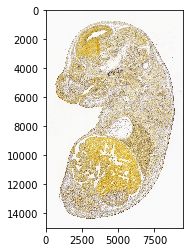

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
plt.show()

In [65]:
# olfactory bulb is in the top left corner of the image
left=3000
top=1000
width=4000
height=3000
image_criteria = 'left=' + str(left) + '&top=' + str(top) + '&width=' + str(width) + '&height=' + str(height)

# query cropped image
q = image_query + '/' + str(our_image_ids[0]) + '?' + image_criteria
r = requests.get(q, stream=True)

print(q)

# http://api.brain-map.org/api/v2/image_download/[SubImage.id]
#?downsample=[#]&quality=[#]
#&view=[expression|projection|tumor_feature_annotation|tumor_feature_boundary]


http://api.brain-map.org/api/v2/image_download/100938255?left=3000&top=1000&width=4000&height=3000


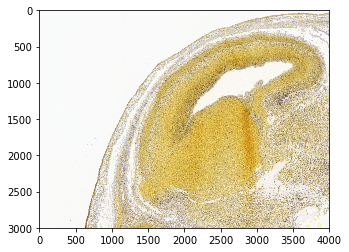

In [66]:
img2 = Image.open(BytesIO(r.content))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img2)
plt.show()